## Import the Libraries

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
iris_data = pd.read_csv("iris.csv")

In [3]:
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
#Label encoder to convert String to numeric values 
label_encoder = LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [5]:
#Convert input to numpy array
np_iris = iris_data.to_numpy()

In [6]:
#Separate independent and target variables
X = np_iris[:,0:4]
Y=np_iris[:,4]

In [8]:
print("\nFeatures before scaling :\n------------------------------------")
print(X[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X)

#Scale the numeric feature variables
X = scaler.transform(X)

#Convert target variable as a one-hot-encoding array
Y = tf.keras.utils.to_categorical(Y,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y[:5,:])


Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


### Creating a Model in Keras



In [10]:
#Number of classes in the target variable
n_classes=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    
                             input_shape=(4,),       
                              name='Hidden-Layer-1', 
                              activation='relu'))    

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(n_classes,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#PSiummary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Training and evaluating the Model




Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 56ms/step - loss: 0.8202 - accuracy: 0.7407 - val_loss: 0.5538 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5502 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.8519
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4353 - accuracy: 0.8426 - val_loss: 0.3320 - val_accuracy: 0.8519
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3671 - accuracy: 0.8611 - val_loss: 0.2918 - val_accuracy: 0.8519
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.8889 - val_loss: 0.2647 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.2822 - accuracy: 0.8889 - val_loss: 0.2548 - val_accuracy: 0.8889
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2586 - accuracy: 0.9074 - val_loss: 0.2308

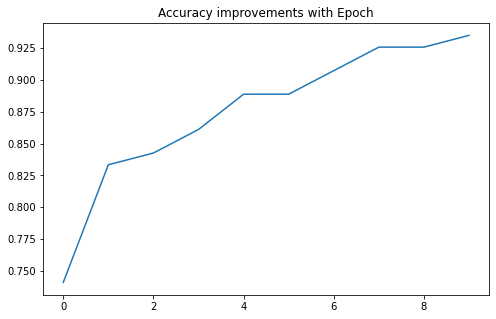


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 23ms/step - loss: 0.4299 - accuracy: 0.8667


[0.42992526292800903, 0.8666666746139526]

In [11]:
#Make it verbose so we can see the progress
verbose=1

#Setup Hyper Parameters for training


batch_size=16
#Set number of epochs
epochs=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
validation_split=0.2

print("\nTraining Progress:\n------------------------------------")


history=model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_split=validation_split)

print("\nAccuracy during Training :\n------------------------------------")


#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

### Saving and Loading Models

In [12]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Predictions with Deep Learning Model

In [13]:
prediction_input = [[6.6, 3. , 4.4, 1.4]]

scaled_input = scaler.transform(prediction_input)

predict = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , predict)

#Find prediction
prediction = np.argmax(predict)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


Raw Prediction Output (Probabilities) : [[0.0282712  0.70955604 0.26217267]]
Prediction is  ['versicolor']
